<a href="https://colab.research.google.com/github/archanaqre/Concurrent_ChatGPT_execution/blob/main/Chittagong_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('weatherChittagong.csv')
df.head()

,year,month,day,tempHigh,tempAvg,tempLow,DPHigh,DPAvg,DPLow,humidityHigh,humidityAvg,humidityLow,SLPHigh,SLPAvg,SLPLow,visibilityHigh,visibilityAvg,visibilityLow,windAvg,Rainfall
0,2012,1,1,28,23,19,18,14,10,88,57,34,1015,1012,1010,6,5,4,5,0.0
1,2012,1,2,26,22,18,17,15,13,88,65,47,1015,1013,1012,4,3,2,2,0.0
2,2012,1,3,27,22,17,20,17,16,94,71,54,1014,1012,1010,5,4,4,6,0.0
3,2012,1,4,26,23,20,18,17,15,83,66,51,1015,1013,1010,4,3,1,3,0.0
4,2012,1,5,26,23,19,18,17,16,88,71,57,1016,1014,1012,4,3,1,3,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2191 non-null   int64  
 1   month           2191 non-null   int64  
 2   day             2191 non-null   int64  
 3   tempHigh        2191 non-null   int64  
 4   tempAvg         2191 non-null   int64  
 5   tempLow         2191 non-null   int64  
 6   DPHigh          2191 non-null   int64  
 7   DPAvg           2191 non-null   int64  
 8   DPLow           2191 non-null   int64  
 9   humidityHigh    2191 non-null   int64  
 10  humidityAvg     2191 non-null   int64  
 11  humidityLow     2191 non-null   int64  
 12  SLPHigh         2191 non-null   int64  
 13  SLPAvg          2191 non-null   int64  
 14  SLPLow          2191 non-null   int64  
 15  visibilityHigh  2191 non-null   int64  
 16  visibilityAvg   2191 non-null   int64  
 17  visibilityLow   2191 non-null   i

In [ ]:
df['Rainfall']=df['Rainfall'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
df.head()

,year,month,day,tempHigh,tempAvg,tempLow,DPHigh,DPAvg,DPLow,humidityHigh,humidityAvg,humidityLow,SLPHigh,SLPAvg,SLPLow,visibilityHigh,visibilityAvg,visibilityLow,windAvg,Rainfall
0,2012,1,1,28,23,19,18,14,10,88,57,34,1015,1012,1010,6,5,4,5,0
1,2012,1,2,26,22,18,17,15,13,88,65,47,1015,1013,1012,4,3,2,2,0
2,2012,1,3,27,22,17,20,17,16,94,71,54,1014,1012,1010,5,4,4,6,0
3,2012,1,4,26,23,20,18,17,15,83,66,51,1015,1013,1010,4,3,1,3,0
4,2012,1,5,26,23,19,18,17,16,88,71,57,1016,1014,1012,4,3,1,3,0


In [ ]:
df.describe()

,year,month,day,tempHigh,tempAvg,tempLow,DPHigh,DPAvg,DPLow,humidityHigh,humidityAvg,humidityLow,SLPHigh,SLPAvg,SLPLow,visibilityHigh,visibilityAvg,visibilityLow,windAvg,Rainfall
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,2014.500685,6.524418,15.726609,30.172980,26.296212,22.555454,23.656778,21.920128,19.727978,91.902784,74.968964,54.916933,1009.896851,1007.621634,1005.516203,5.339115,4.487905,2.960749,8.543587,0.265632
std,1.708126,3.448542,8.800821,2.926921,3.392764,4.288724,4.070043,4.705822,5.707636,5.798138,10.539248,16.924232,5.234182,4.941176,5.010271,2.019883,1.043228,1.507459,4.826184,0.441770
min,2012.000000,1.000000,1.000000,14.000000,13.000000,9.000000,10.000000,7.000000,0.000000,48.000000,33.000000,4.000000,996.000000,991.000000,978.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.000000,28.000000,24.000000,19.000000,21.000000,18.000000,16.000000,89.000000,70.000000,44.000000,1006.000000,1004.000000,1002.000000,5.000000,4.000000,2.000000,5.000000,0.000000
50%,2015.000000,7.000000,16.000000,31.000000,27.000000,24.000000,26.000000,24.000000,22.000000,94.000000,76.000000,58.000000,1010.000000,1008.000000,1006.000000,5.000000,5.000000,3.000000,8.000000,0.000000
75%,2016.000000,10.000000,23.000000,32.000000,29.000000,26.000000,27.000000,26.000000,24.000000,94.000000,82.000000,66.000000,1014.000000,1012.000000,1010.000000,6.000000,5.000000,4.000000,11.000000,1.000000
max,2017.000000,12.000000,31.000000,51.000000,39.000000,29.000000,32.000000,28.000000,27.000000,100.000000,99.000000,94.000000,1061.000000,1018.000000,1017.000000,27.000000,7.000000,6.000000,37.000000,1.000000


In [ ]:
df.isna().sum()

year              0
month             0
day               0
tempHigh          0
tempAvg           0
tempLow           0
DPHigh            0
DPAvg             0
DPLow             0
humidityHigh      0
humidityAvg       0
humidityLow       0
SLPHigh           0
SLPAvg            0
SLPLow            0
visibilityHigh    0
visibilityAvg     0
visibilityLow     0
windAvg           0
Rainfall          0
dtype: int64

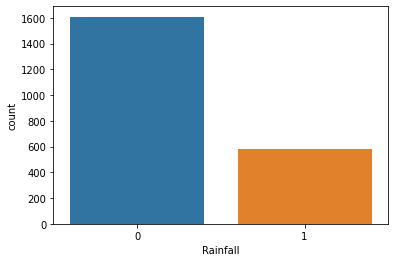

In [ ]:
sns.countplot(x = 'Rainfall', data = df)

In [ ]:
df.columns

Index(['year', 'month', 'day', 'tempHigh', 'tempAvg', 'tempLow', 'DPHigh',
       'DPAvg', 'DPLow', 'humidityHigh', 'humidityAvg', 'humidityLow',
       'SLPHigh', 'SLPAvg', 'SLPLow', 'visibilityHigh', 'visibilityAvg',
       'visibilityLow', 'windAvg', 'Rainfall'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

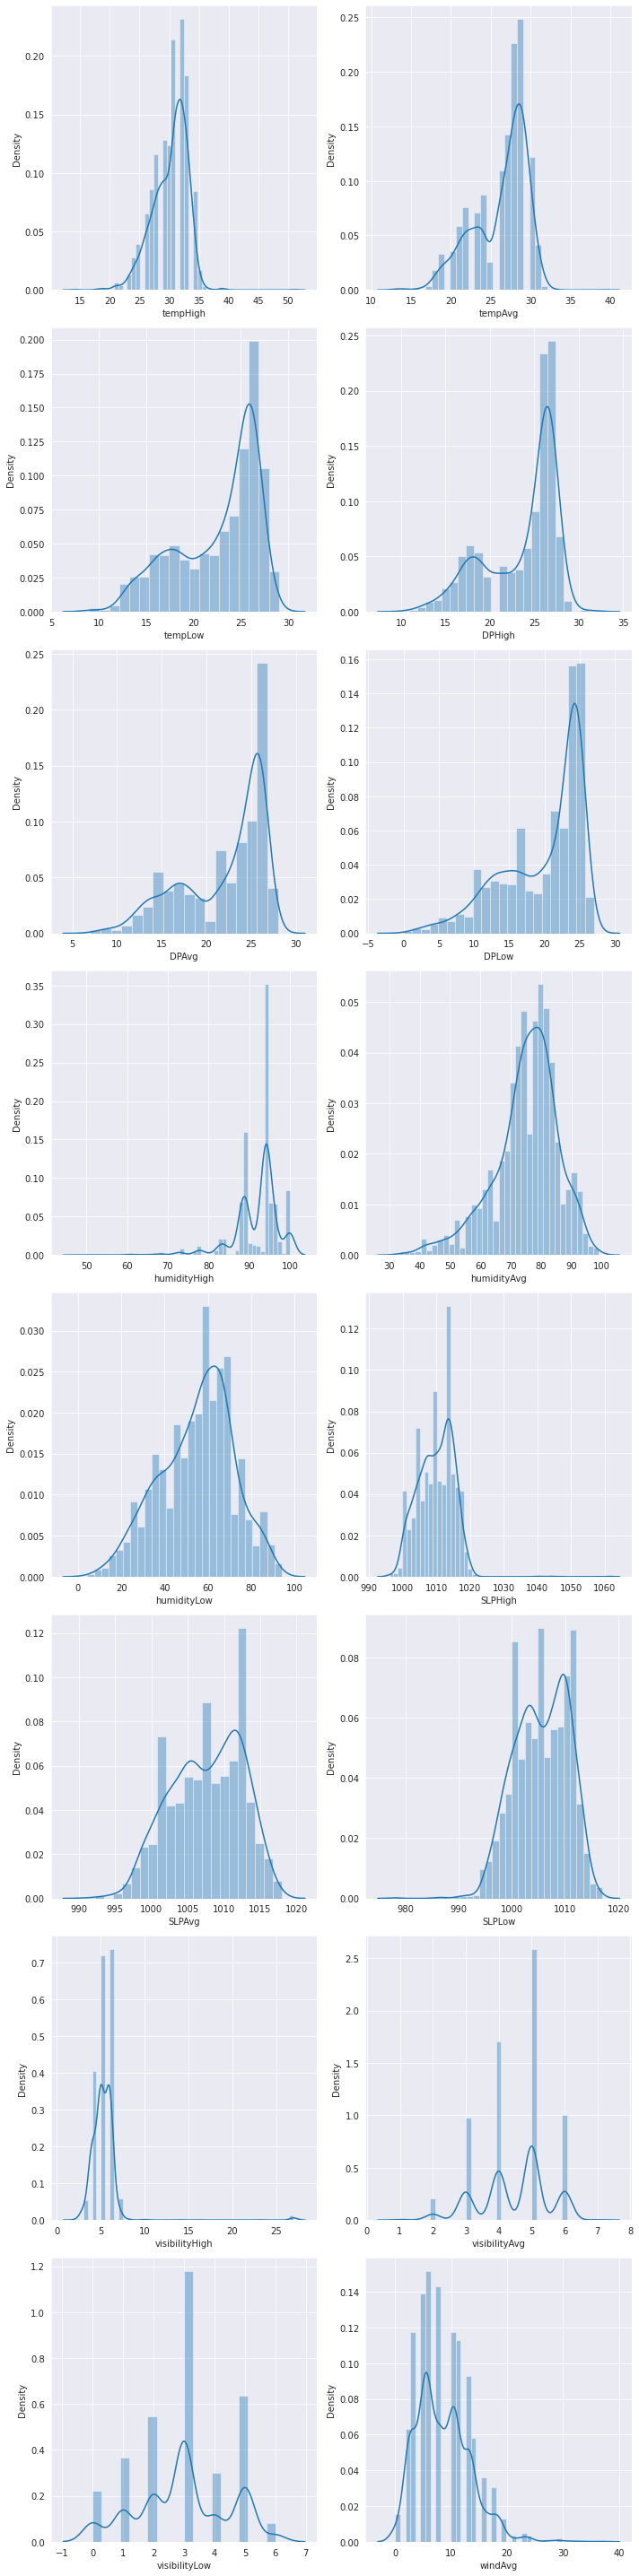

In [ ]:
sns.set_style('darkgrid')
cols = ['tempHigh', 'tempAvg', 'tempLow', 'DPHigh',
       'DPAvg', 'DPLow', 'humidityHigh', 'humidityAvg', 'humidityLow',
       'SLPHigh', 'SLPAvg', 'SLPLow', 'visibilityHigh', 'visibilityAvg',
       'visibilityLow', 'windAvg']
n_rows = 8
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c
        ax = axs[r][c]

        sns.distplot(df[cols[i]], ax = ax)

    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

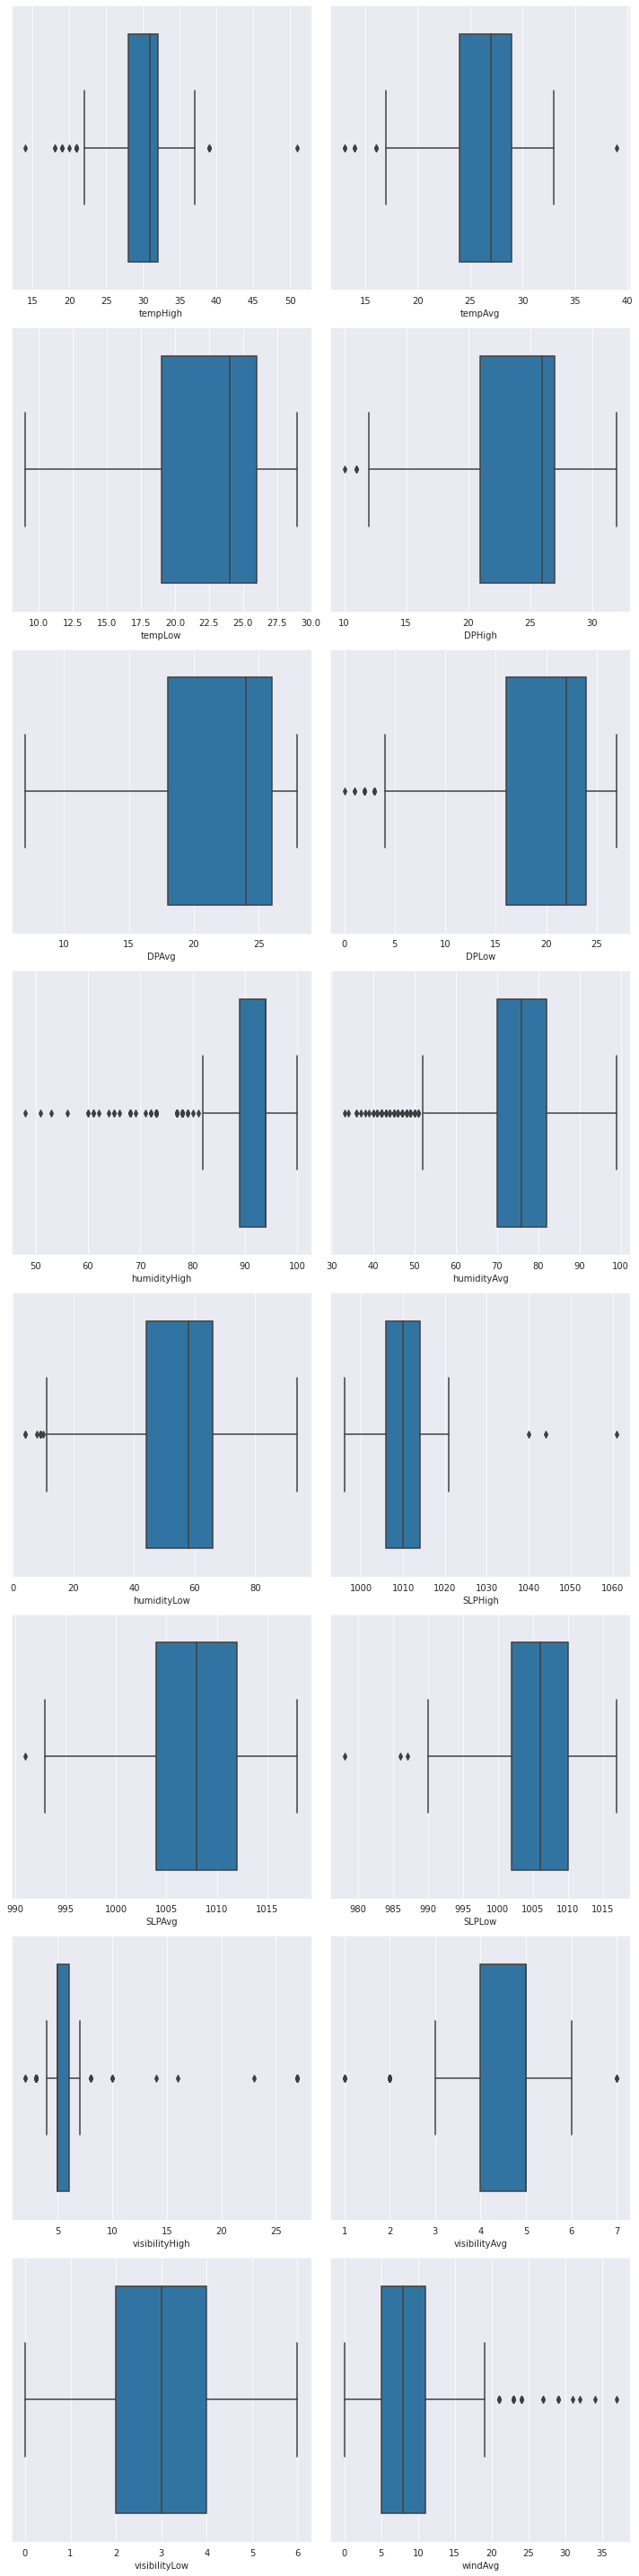

In [ ]:
sns.set_style('darkgrid')
cols = ['tempHigh', 'tempAvg', 'tempLow', 'DPHigh',
       'DPAvg', 'DPLow', 'humidityHigh', 'humidityAvg', 'humidityLow',
       'SLPHigh', 'SLPAvg', 'SLPLow', 'visibilityHigh', 'visibilityAvg',
       'visibilityLow', 'windAvg']
n_rows = 8
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c
        ax = axs[r][c]

        sns.boxplot(df[cols[i]], ax = ax)

    plt.tight_layout()

In [ ]:
df.corr()

,year,month,day,tempHigh,tempAvg,tempLow,DPHigh,DPAvg,DPLow,humidityHigh,humidityAvg,humidityLow,SLPHigh,SLPAvg,SLPLow,visibilityHigh,visibilityAvg,visibilityLow,windAvg,Rainfall
year,1.000000,-0.000720,0.000605,0.177024,0.097785,0.030085,0.059737,0.035312,0.025779,-0.104675,-0.113302,-0.131620,0.071152,0.067468,0.051526,-0.038249,-0.120495,-0.070391,0.115305,0.020333
month,-0.000720,1.000000,0.011180,0.051312,0.150358,0.202650,0.233272,0.264120,0.289672,0.280016,0.322890,0.233580,-0.124803,-0.122122,-0.130371,0.060070,0.133954,0.118852,-0.225044,0.107838
day,0.000605,0.011180,1.000000,-0.029699,-0.017060,-0.007770,-0.007822,-0.002722,0.008864,0.030870,0.013565,0.009814,0.015208,0.003206,-0.003032,-0.030487,-0.032115,-0.000362,0.011338,0.020684
tempHigh,0.177024,0.051312,-0.029699,1.000000,0.887999,0.721175,0.684243,0.637190,0.549562,-0.103029,0.019107,0.064088,-0.431610,-0.463099,-0.473621,0.281021,0.630037,0.501398,0.123934,0.080984
tempAvg,0.097785,0.150358,-0.017060,0.887999,1.000000,0.949590,0.886271,0.868979,0.792871,0.058984,0.357474,0.420653,-0.647970,-0.680930,-0.684072,0.312294,0.700827,0.587062,0.232610,0.259444
tempLow,0.030085,0.202650,-0.007770,0.721175,0.949590,1.000000,0.918189,0.924606,0.866478,0.153923,0.537074,0.608207,-0.724486,-0.754972,-0.752332,0.295092,0.673506,0.588675,0.278684,0.344575
DPHigh,0.059737,0.233272,-0.007822,0.684243,0.886271,0.918189,1.000000,0.967865,0.896471,0.341303,0.664353,0.663056,-0.713322,-0.742996,-0.743975,0.272940,0.609968,0.501652,0.209792,0.384683
DPAvg,0.035312,0.264120,-0.002722,0.637190,0.868979,0.924606,0.967865,1.000000,0.953162,0.383571,0.735439,0.741387,-0.735251,-0.763340,-0.761363,0.273167,0.605733,0.510581,0.209322,0.396568
DPLow,0.025779,0.289672,0.008864,0.549562,0.792871,0.866478,0.896471,0.953162,1.000000,0.395599,0.751748,0.803053,-0.697285,-0.720517,-0.716885,0.255629,0.568080,0.479207,0.188028,0.381803
humidityHigh,-0.104675,0.280016,0.030870,-0.103029,0.058984,0.153923,0.341303,0.383571,0.395599,1.000000,0.691263,0.487138,-0.214419,-0.224992,-0.224836,0.008158,-0.070513,-0.162022,-0.162791,0.237733


(20.0, 0.0)

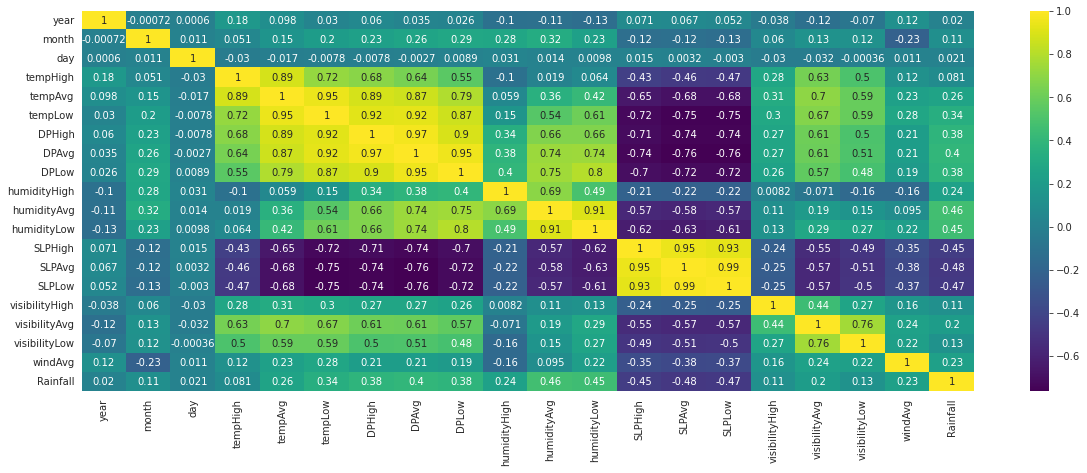

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(20, 0)

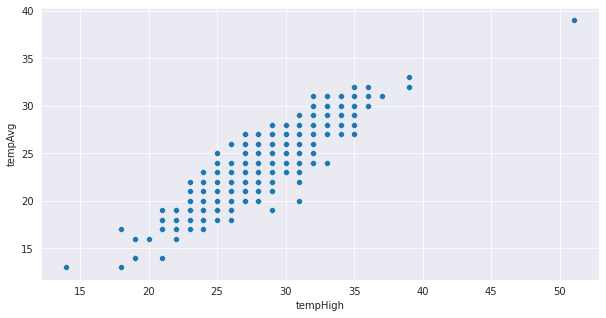

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'tempHigh', y = 'tempAvg', data = df)

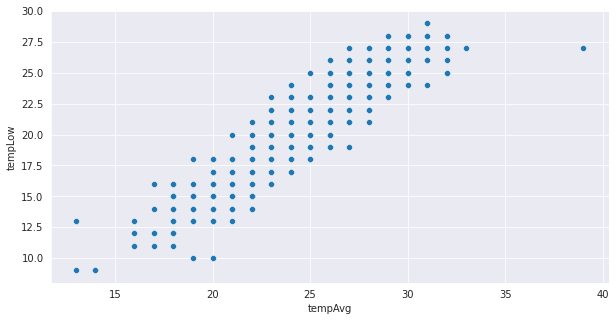

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'tempAvg', y = 'tempLow', data = df)

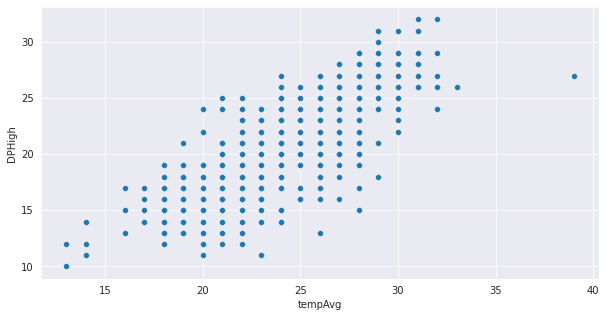

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'tempAvg', y = 'DPHigh', data = df)

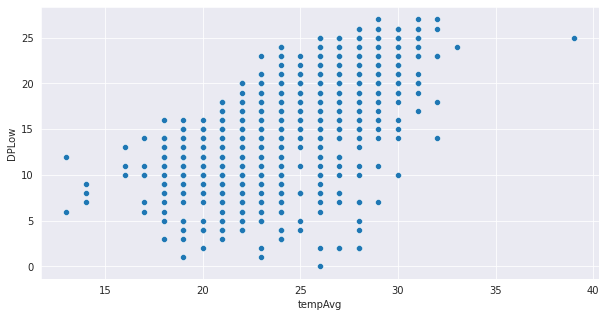

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'tempAvg', y = 'DPLow', data = df)

In [ ]:
df['Rainfall'].value_counts()

0    1609
1     582
Name: Rainfall, dtype: int64

In [ ]:
df.corr()['Rainfall'].drop('Rainfall').sort_values

<bound method Series.sort_values of year              0.020333
month             0.107838
day               0.020684
tempHigh          0.080984
tempAvg           0.259444
tempLow           0.344575
DPHigh            0.384683
DPAvg             0.396568
DPLow             0.381803
humidityHigh      0.237733
humidityAvg       0.464677
humidityLow       0.453367
SLPHigh          -0.453197
SLPAvg           -0.476688
SLPLow           -0.471896
visibilityHigh    0.114951
visibilityAvg     0.202160
visibilityLow     0.128113
windAvg           0.229724
Name: Rainfall, dtype: float64>

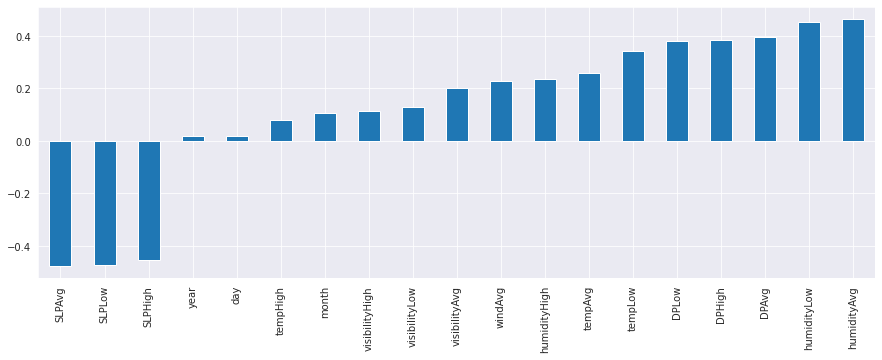

In [ ]:
plt.figure(figsize = (15,5))
df.corr()['Rainfall'].drop('Rainfall').sort_values().plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

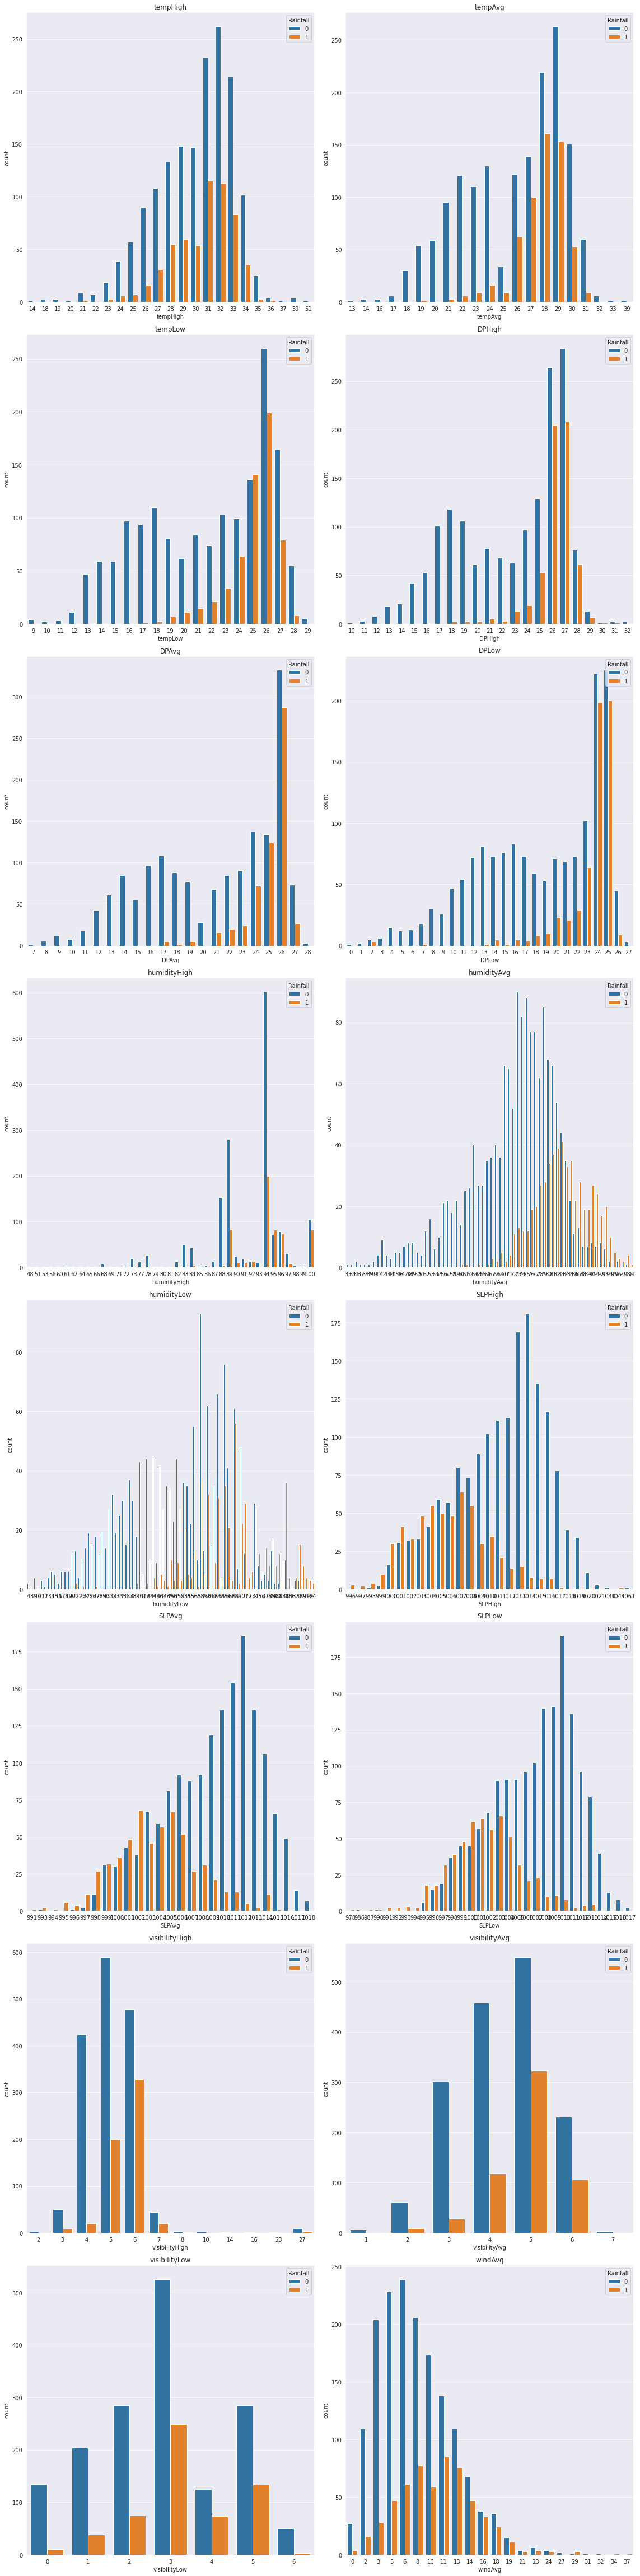

In [ ]:
cols = ['tempHigh', 'tempAvg', 'tempLow', 'DPHigh',
       'DPAvg', 'DPLow', 'humidityHigh', 'humidityAvg', 'humidityLow',
       'SLPHigh', 'SLPAvg', 'SLPLow', 'visibilityHigh', 'visibilityAvg',
       'visibilityLow', 'windAvg']

n_rows = 8
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c  # setting index to go through each columns
        ax = axs[r][c]   # Just to show where to position each of the 4 subplots

        #Creating subplots - using i to loop though each of the 4 columns we created
        sns.countplot(df[cols[i]], hue = df['Rainfall'], ax = ax)

        # Setting title for each chart
        ax.set_title(cols[i])

        #Setting legend for each chart
        ax.legend(title = 'Rainfall', loc = 'upper right')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


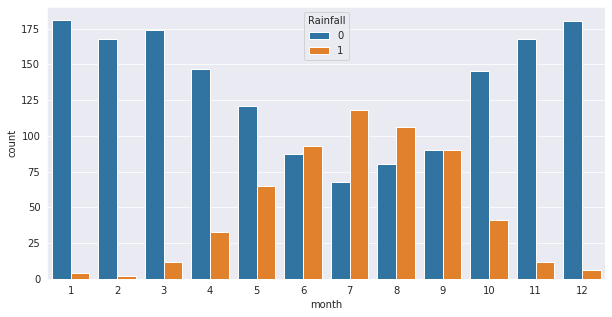

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(df['month'], hue = df['Rainfall'])

In [ ]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df['month'].value_counts()

Mar    186
May    186
Jul    186
Aug    186
Oct    186
Dec    186
Jan    185
Apr    180
Jun    180
Sep    180
Nov    180
Feb    170
Name: month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


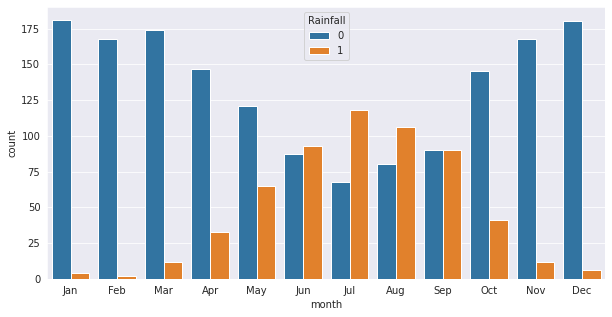

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(df['month'], hue = df['Rainfall'])

In [ ]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "int64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['month']
Numerical Columns:  ['tempHigh', 'tempAvg', 'tempLow', 'DPHigh', 'DPAvg', 'DPLow', 'humidityHigh', 'humidityAvg', 'humidityLow', 'SLPHigh', 'SLPAvg', 'SLPLow', 'visibilityHigh', 'visibilityAvg', 'visibilityLow', 'windAvg', 'Rainfall']
Other Columns:  []


In [ ]:
df = df.drop('year', axis = 1)

In [ ]:
df = df.drop('day', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           2191 non-null   object
 1   tempHigh        2191 non-null   int64 
 2   tempAvg         2191 non-null   int64 
 3   tempLow         2191 non-null   int64 
 4   DPHigh          2191 non-null   int64 
 5   DPAvg           2191 non-null   int64 
 6   DPLow           2191 non-null   int64 
 7   humidityHigh    2191 non-null   int64 
 8   humidityAvg     2191 non-null   int64 
 9   humidityLow     2191 non-null   int64 
 10  SLPHigh         2191 non-null   int64 
 11  SLPAvg          2191 non-null   int64 
 12  SLPLow          2191 non-null   int64 
 13  visibilityHigh  2191 non-null   int64 
 14  visibilityAvg   2191 non-null   int64 
 15  visibilityLow   2191 non-null   int64 
 16  windAvg         2191 non-null   int64 
 17  Rainfall        2191 non-null   int64 
dtypes: int64

In [ ]:
def ctgplt(variable,to):

    "Function for visualization of categorical variables."

    var = df[variable]
    values=var.value_counts()

    f, ax = plt.subplots(figsize = (8,8))
    g = sns.barplot(x = variable, y = to, data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()

    print("{}:\n{}".format(variable,values))

def numplt(data,variable,to):

  "Function for visualization of numerical variables."

  c = sns.FacetGrid(data,col=to,height=6)
  c.map(sns.distplot,variable,bins=25)
  plt.show()

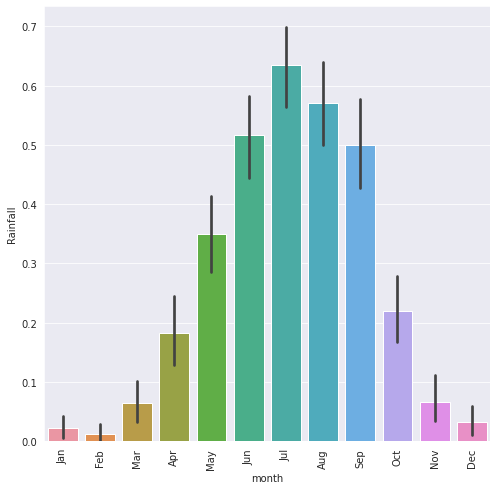

month:
Mar    186
May    186
Jul    186
Aug    186
Oct    186
Dec    186
Jan    185
Apr    180
Jun    180
Sep    180
Nov    180
Feb    170
Name: month, dtype: int64


In [ ]:
for i in cat_cols:
    ctgplt(i, "Rainfall")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


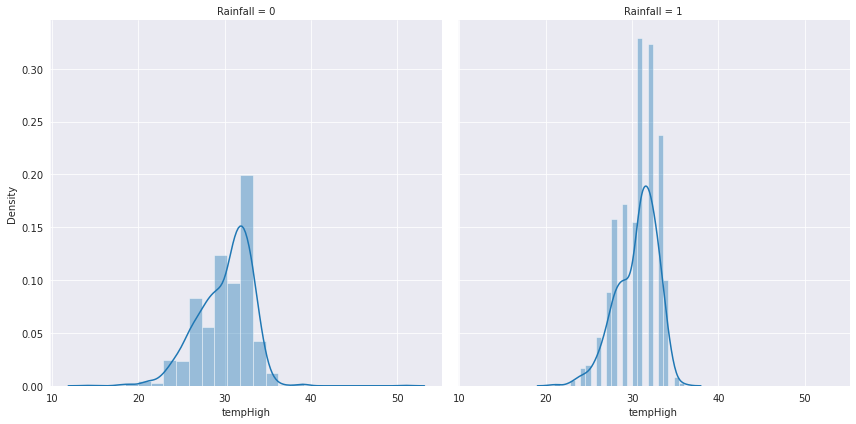

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


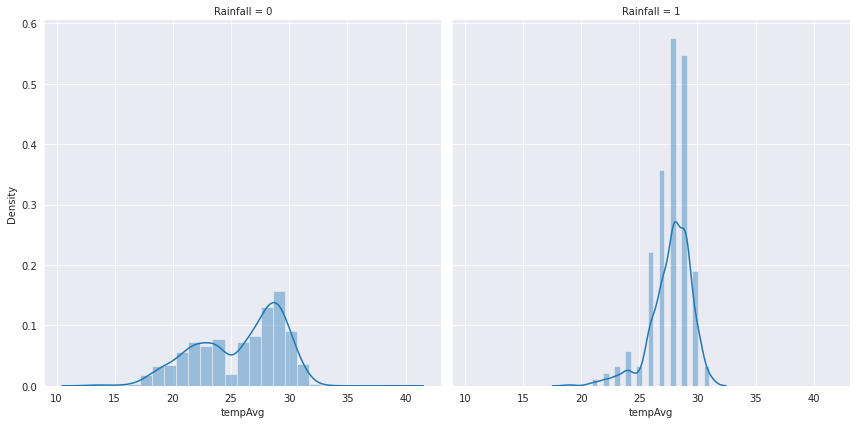

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


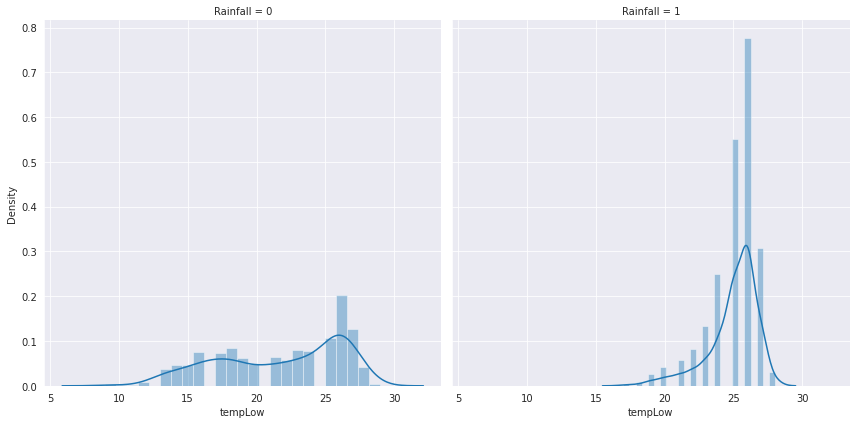

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


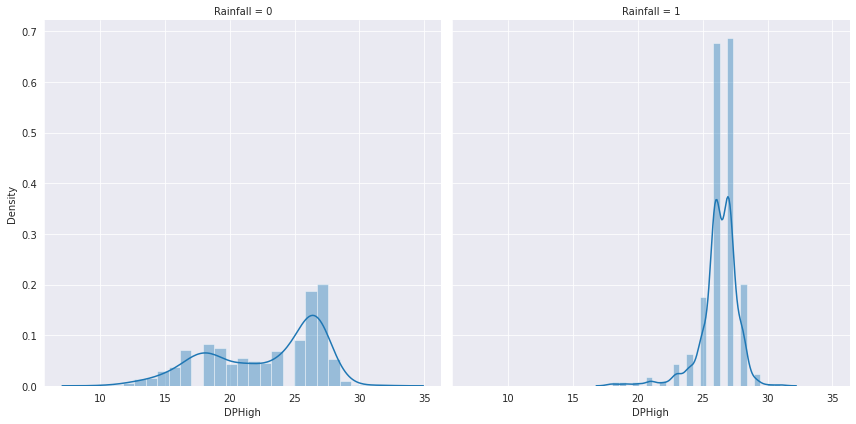

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


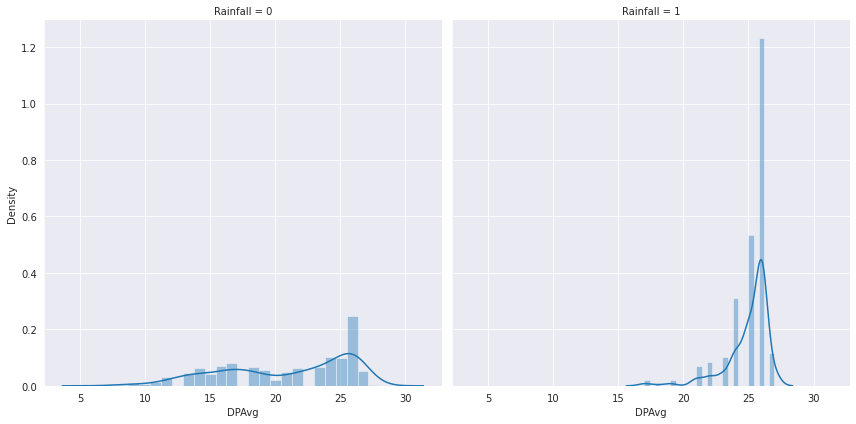

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


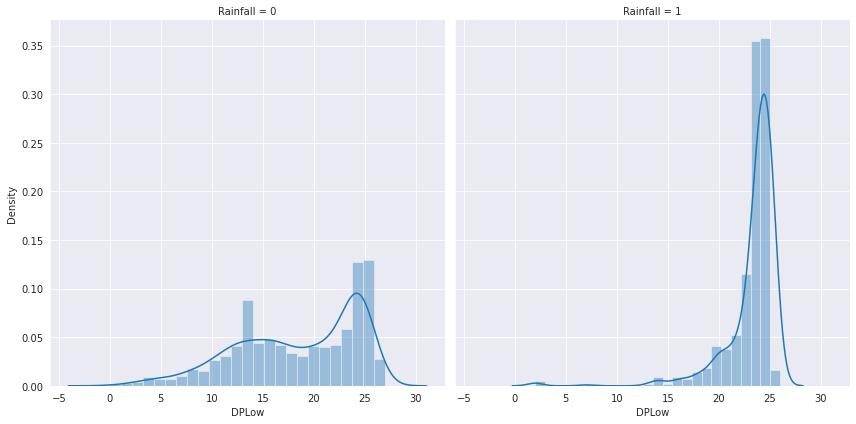

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


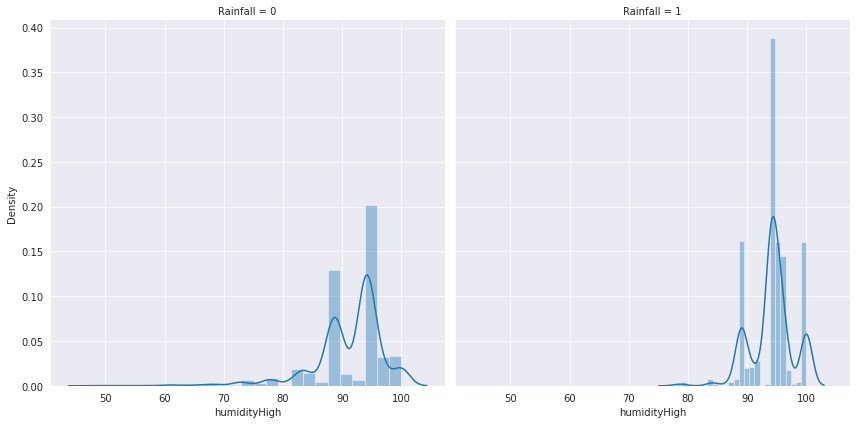

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


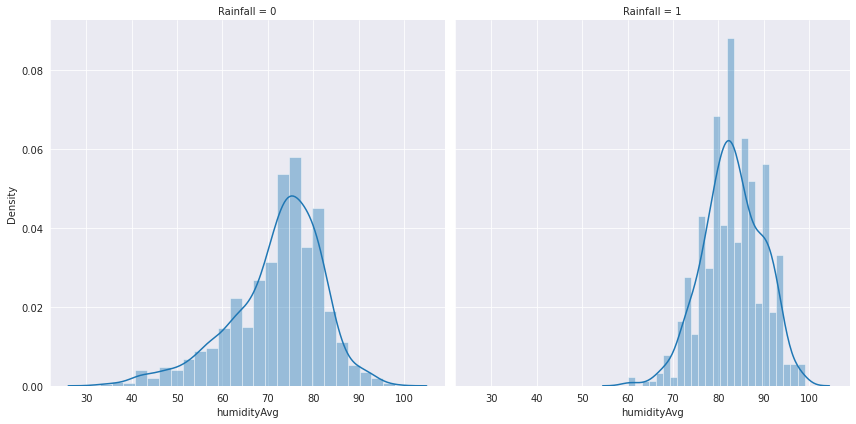

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


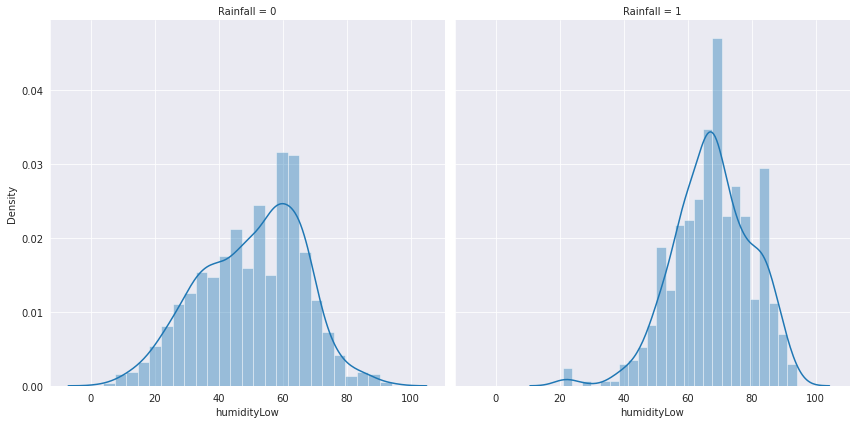

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


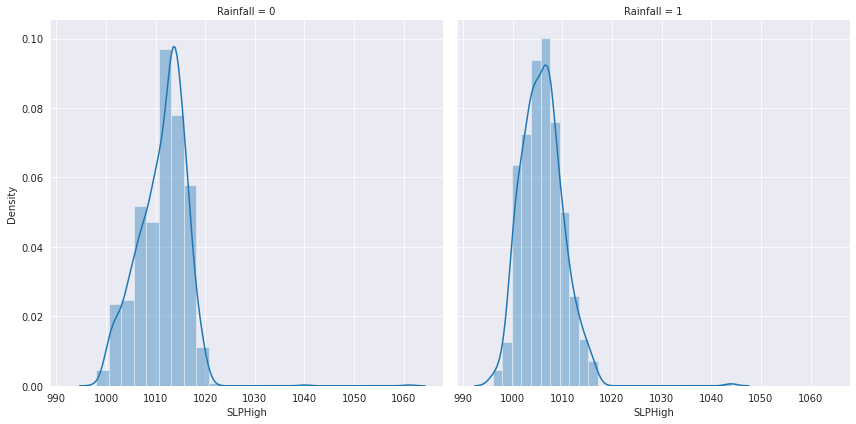

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


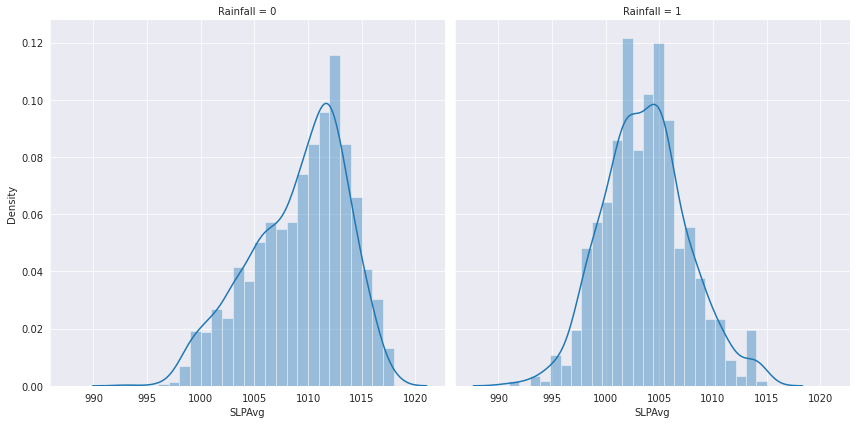

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


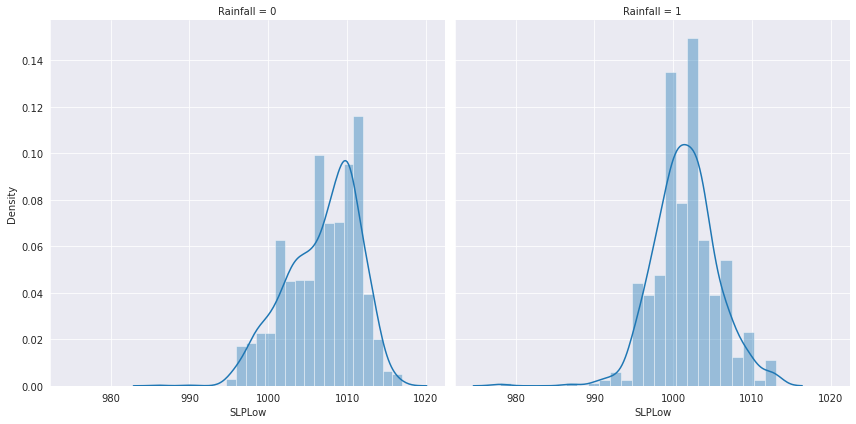

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


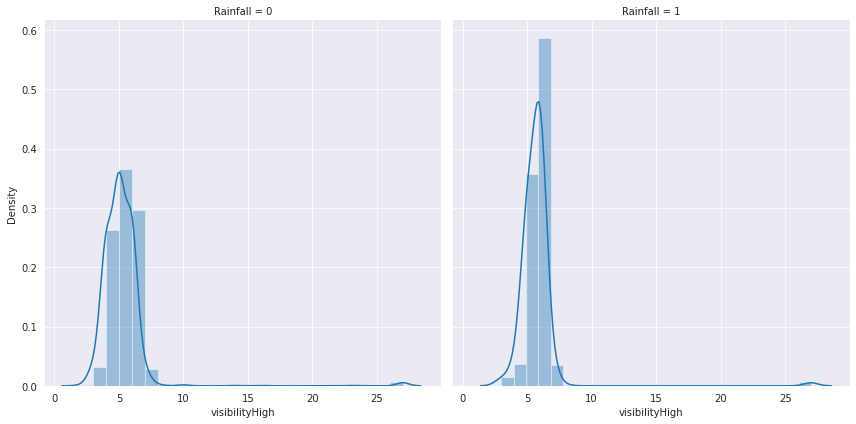

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


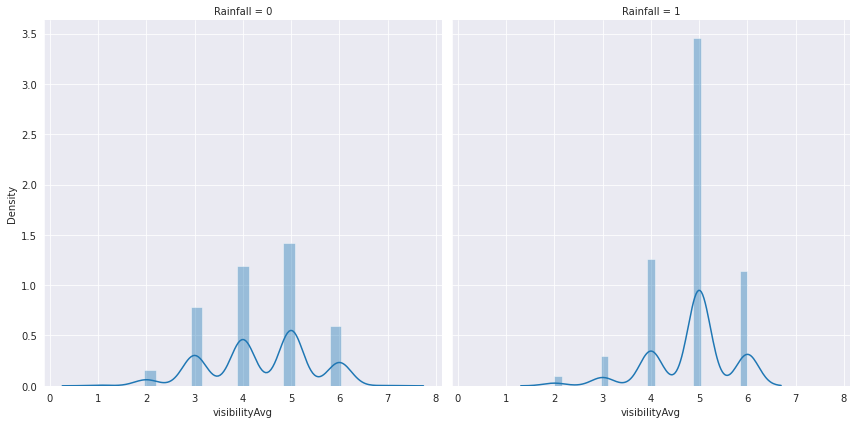

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


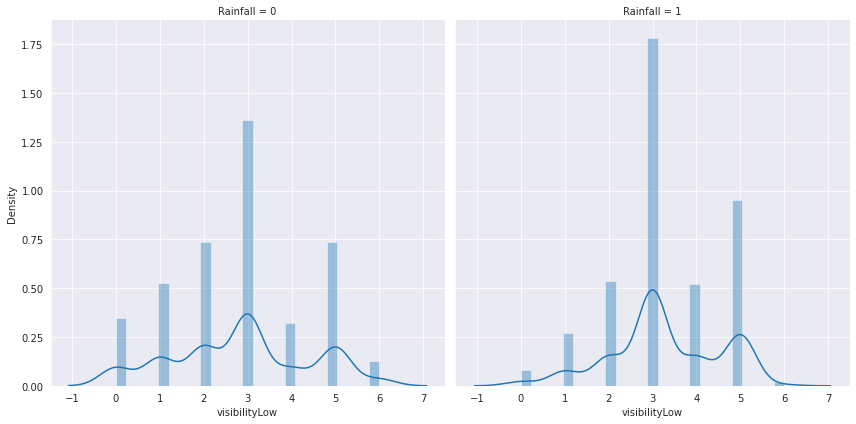

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


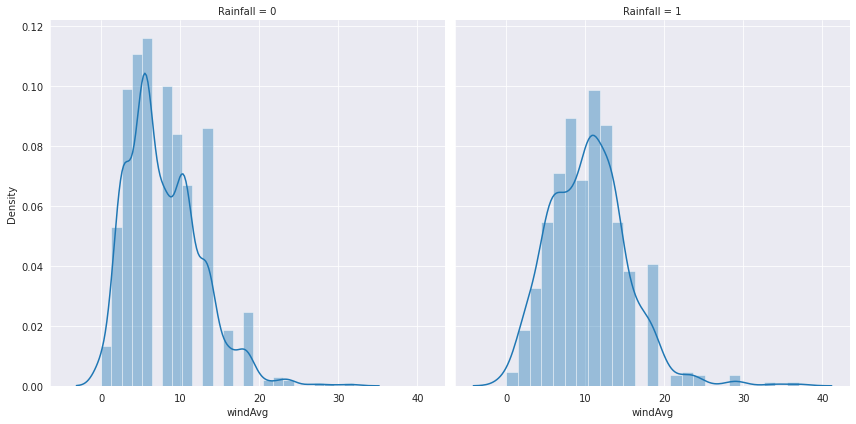

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

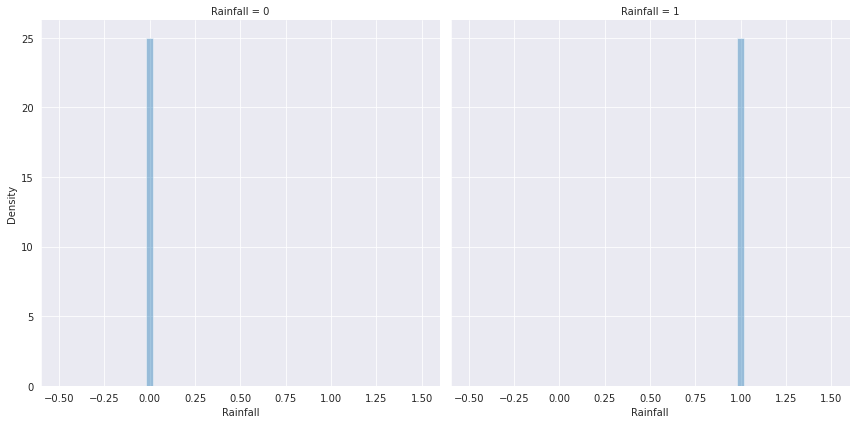

In [ ]:
for k in num_cols:
    numplt(df, k, "Rainfall")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


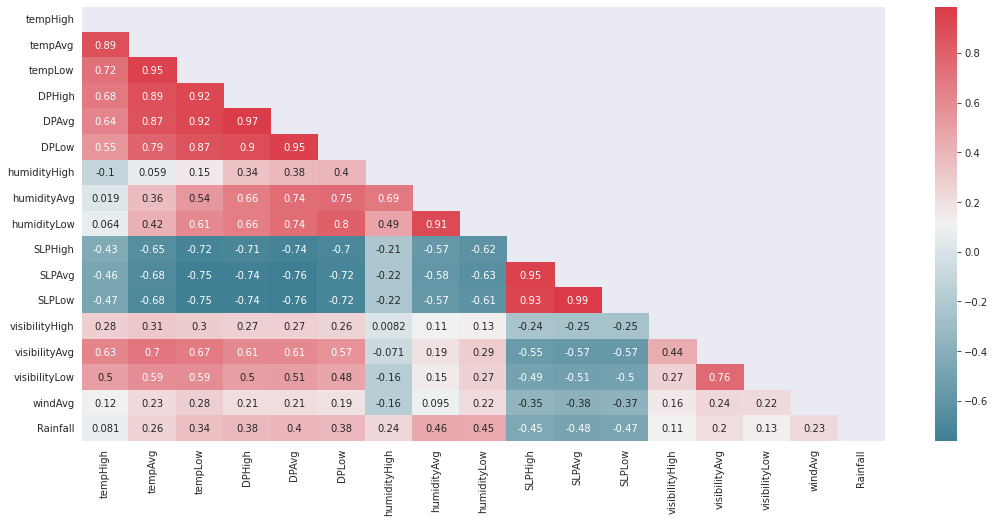

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

In [ ]:
df.drop(columns = ['tempLow', 'tempAvg', 'DPHigh','DPAvg','DPLow','SLPLow','SLPAvg'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


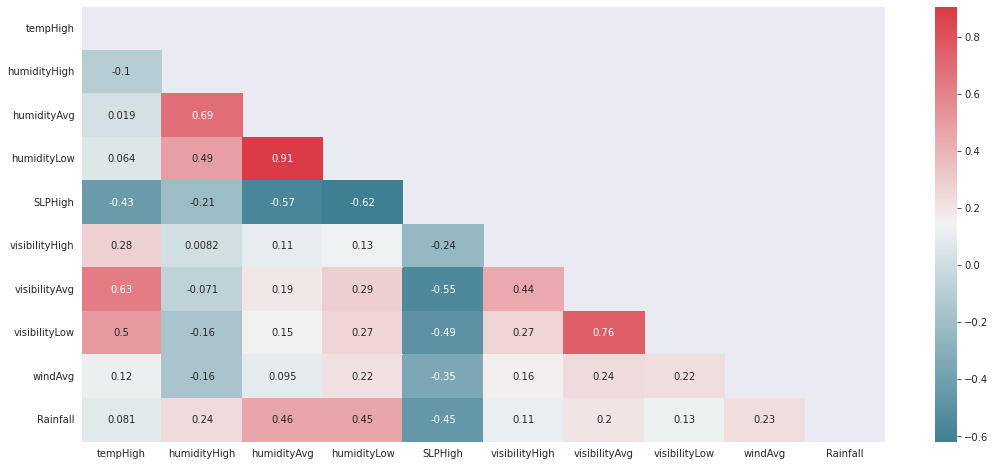

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           2191 non-null   object
 1   tempHigh        2191 non-null   int64 
 2   humidityHigh    2191 non-null   int64 
 3   humidityAvg     2191 non-null   int64 
 4   humidityLow     2191 non-null   int64 
 5   SLPHigh         2191 non-null   int64 
 6   visibilityHigh  2191 non-null   int64 
 7   visibilityAvg   2191 non-null   int64 
 8   visibilityLow   2191 non-null   int64 
 9   windAvg         2191 non-null   int64 
 10  Rainfall        2191 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 188.4+ KB


In [ ]:
Q3 = df["humidityHigh"].quantile(0.75)
Q1 = df["humidityHigh"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["humidityHigh"].fillna(1) < (maxm)]

Q3 = df["windAvg"].quantile(0.75)
Q1 = df["windAvg"].quantile(0.25)

IQR = Q3 - Q1
step = IQR * 3

maxm = Q3 + step
minm = Q1 - step

df = df[df["windAvg"].fillna(1) < (maxm)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


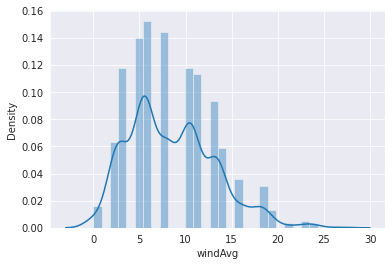

In [ ]:
sns.distplot(df["windAvg"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


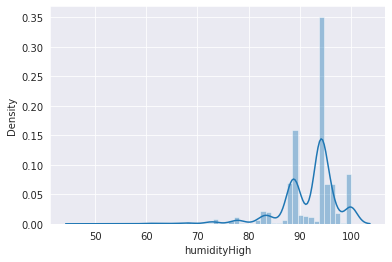

In [ ]:
sns.distplot(df["humidityHigh"])
plt.show()

In [ ]:
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

,Missing Values,% of Total Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 0 to 2190
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   month           2183 non-null   object
 1   tempHigh        2183 non-null   int64 
 2   humidityHigh    2183 non-null   int64 
 3   humidityAvg     2183 non-null   int64 
 4   humidityLow     2183 non-null   int64 
 5   SLPHigh         2183 non-null   int64 
 6   visibilityHigh  2183 non-null   int64 
 7   visibilityAvg   2183 non-null   int64 
 8   visibilityLow   2183 non-null   int64 
 9   windAvg         2183 non-null   int64 
 10  Rainfall        2183 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 204.7+ KB


In [ ]:
cat_cols = []
num_cols = []
other_cols = []

for each in df.columns:
    if df[each].dtype == "object":
        cat_cols.append(each)
    elif df[each].dtype == "int64":
        num_cols.append(each)
    else:
        other_cols.append(each)
print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)
print("Other Columns: ",other_cols)

Categorical Columns:  ['month']
Numerical Columns:  ['tempHigh', 'humidityHigh', 'humidityAvg', 'humidityLow', 'SLPHigh', 'visibilityHigh', 'visibilityAvg', 'visibilityLow', 'windAvg', 'Rainfall']
Other Columns:  []


In [ ]:
dummies = pd.get_dummies(df[['month' ]],drop_first=True)

In [ ]:
df = df.drop(['month'], axis = 1)

In [ ]:
df = pd.concat([df, dummies], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2183 entries, 0 to 2190
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tempHigh        2183 non-null   int64
 1   humidityHigh    2183 non-null   int64
 2   humidityAvg     2183 non-null   int64
 3   humidityLow     2183 non-null   int64
 4   SLPHigh         2183 non-null   int64
 5   visibilityHigh  2183 non-null   int64
 6   visibilityAvg   2183 non-null   int64
 7   visibilityLow   2183 non-null   int64
 8   windAvg         2183 non-null   int64
 9   Rainfall        2183 non-null   int64
 10  month_Aug       2183 non-null   uint8
 11  month_Dec       2183 non-null   uint8
 12  month_Feb       2183 non-null   uint8
 13  month_Jan       2183 non-null   uint8
 14  month_Jul       2183 non-null   uint8
 15  month_Jun       2183 non-null   uint8
 16  month_Mar       2183 non-null   uint8
 17  month_May       2183 non-null   uint8
 18  month_Nov       2183 non-nul

In [ ]:
df.to_csv("OutputChittagong.csv")